# DaACON 반도체 박막 두꼐 분석 경진대회
### EDA
### 데이터 셋
[DACON](https://dacon.io/competitions/official/235554/data)

### 사용 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

### Data Load

In [3]:
import glob

path = glob.glob("data/*")

In [6]:
train, test = pd.read_csv(path[2]), pd.read_csv(path[1])
train.shape, test.shape

((810000, 230), (10000, 227))

In [8]:
display(train.sample(3))
display(test.sample(3))

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
91709,40,120,270,300,0.148885,0.103066,0.100068,0.064167,0.021064,0.029780,...,0.802554,0.808543,0.828564,0.826628,0.821776,0.795926,0.787791,0.788867,0.746646,0.729372
129515,50,240,280,60,0.463034,0.475389,0.480764,0.494862,0.500729,0.519589,...,0.846077,0.831044,0.860878,0.851646,0.866638,0.871989,0.871738,0.875322,0.850864,0.856422
718544,270,190,120,150,0.605018,0.568754,0.549083,0.513338,0.479576,0.440774,...,0.679677,0.652099,0.598559,0.547120,0.512308,0.458682,0.422646,0.420429,0.415759,0.458486


,id,0,1,2,3,4,5,6,7,8,...,216,217,218,219,220,221,222,223,224,225
1931,1931,0.249124,0.251569,0.287402,0.294294,0.315986,0.299647,0.327649,0.337004,0.324019,...,0.711098,0.691919,0.673264,0.653580,0.664664,0.636997,0.599488,0.589747,0.548003,0.521858
4851,4851,0.351909,0.349462,0.324067,0.333369,0.313441,0.298308,0.271299,0.258686,0.214293,...,0.762983,0.769051,0.760567,0.758441,0.751656,0.754784,0.736080,0.736941,0.716566,0.699416
8225,8225,0.134533,0.175157,0.212275,0.266592,0.311578,0.335653,0.383406,0.428591,0.439771,...,0.602532,0.544929,0.478603,0.443597,0.387834,0.375262,0.401448,0.458173,0.518018,0.590570


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810000 entries, 0 to 809999
Columns: 230 entries, layer_1 to 225
dtypes: float64(226), int64(4)
memory usage: 1.4 GB


In [11]:
train.describe()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,...,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000
mean,155.000000,155.000000,155.000000,155.000000,0.292653,0.292893,0.293125,0.293363,0.293666,0.293994,...,0.600336,0.606206,0.612238,0.618456,0.623942,0.625395,0.627100,0.628997,0.631166,0.633594
std,86.554468,86.554468,86.554468,86.554468,0.181642,0.181857,0.182055,0.182197,0.182361,0.182529,...,0.199727,0.198644,0.197473,0.196177,0.195028,0.194909,0.194730,0.194493,0.194146,0.193725
min,10.000000,10.000000,10.000000,10.000000,-0.014902,-0.014798,-0.014897,-0.014709,-0.014903,-0.014662,...,-0.011992,-0.008661,-0.011430,-0.009827,-0.007632,-0.007411,-0.007073,-0.007101,-0.005519,-0.006074
25%,80.000000,80.000000,80.000000,80.000000,0.135139,0.135180,0.135258,0.135478,0.135585,0.135705,...,0.469345,0.476970,0.484727,0.492739,0.500232,0.501650,0.503811,0.506252,0.509036,0.512067
50%,155.000000,155.000000,155.000000,155.000000,0.286510,0.286874,0.287194,0.287553,0.287830,0.288151,...,0.643685,0.649886,0.656258,0.662860,0.668727,0.670287,0.672145,0.674283,0.676692,0.679339
75%,230.000000,230.000000,230.000000,230.000000,0.435696,0.435956,0.436112,0.436326,0.436634,0.437142,...,0.760737,0.765462,0.770333,0.775263,0.779555,0.780846,0.782387,0.783979,0.785774,0.787759
max,300.000000,300.000000,300.000000,300.000000,0.748205,0.753103,0.749494,0.747389,0.748827,0.750392,...,0.935423,0.934867,0.938873,0.937817,0.942214,0.940367,0.940387,0.941548,0.942411,0.943648


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 227 entries, id to 225
dtypes: float64(226), int64(1)
memory usage: 17.3 MB


In [12]:
test.describe()

,id,0,1,2,3,4,5,6,7,8,...,216,217,218,219,220,221,222,223,224,225
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.298620,0.298523,0.298266,0.298122,0.297840,0.297781,0.297680,0.297628,0.297761,...,0.601752,0.607483,0.613193,0.618859,0.623699,0.624553,0.625722,0.627125,0.628886,0.631377
std,2886.89568,0.182323,0.182546,0.182835,0.183146,0.183721,0.183892,0.184473,0.185290,0.185560,...,0.200110,0.198799,0.198037,0.197150,0.196688,0.197329,0.197532,0.197626,0.197022,0.196373
min,0.00000,-0.014062,-0.014153,-0.013073,-0.013437,-0.013738,-0.013458,-0.013132,-0.014418,-0.013239,...,-0.000326,-0.000018,-0.001248,-0.006506,0.007479,0.007074,0.003891,0.000749,0.010466,0.001458
25%,2499.75000,0.143776,0.142043,0.141642,0.140117,0.139429,0.138310,0.138377,0.136580,0.136497,...,0.470463,0.475866,0.486420,0.493853,0.497811,0.500310,0.504392,0.502767,0.504647,0.509042
50%,4999.50000,0.292133,0.291344,0.291543,0.291320,0.291687,0.291404,0.290600,0.290009,0.292850,...,0.644588,0.651759,0.658020,0.663477,0.669354,0.670082,0.672555,0.674006,0.675324,0.677706
75%,7499.25000,0.440783,0.441728,0.441065,0.442691,0.443197,0.443525,0.443969,0.445480,0.446458,...,0.762421,0.767317,0.770799,0.775913,0.780854,0.782970,0.783460,0.784899,0.785543,0.787843
max,9999.00000,0.738145,0.735195,0.730482,0.727110,0.739487,0.740530,0.739367,0.746795,0.739782,...,0.922739,0.922250,0.924994,0.920316,0.930631,0.928891,0.935706,0.935085,0.937052,0.940716


### 결측치

In [13]:
temp = train.isnull().mean()
temp[temp!=0]

Series([], dtype: float64)

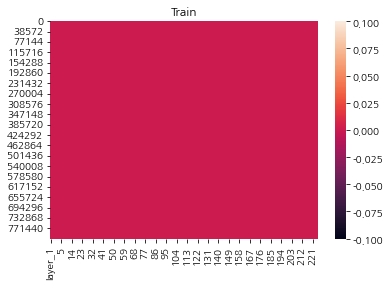

In [16]:
_ = sns.heatmap(data=train.isnull()).set_title("Train")

In [17]:
temp = test.isnull().mean()
temp[temp!=0]

Series([], dtype: float64)

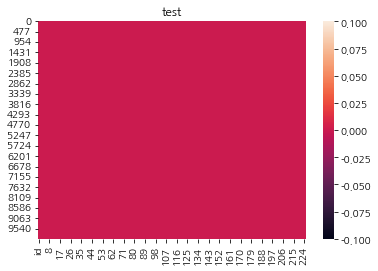

In [18]:
_ = sns.heatmap(data=test.isnull()).set_title("test")

### 상관 관계

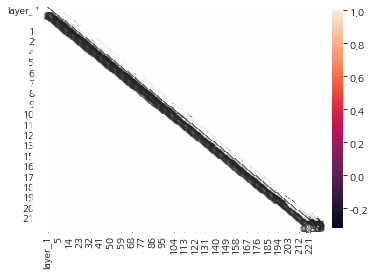

In [20]:
corr = train.corr()
_ = sns.heatmap(corr, annot=True)